In [ ]:
##importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt ## For Data visualization
import seaborn as sns

import json
from pandas import json_normalize ## For flattening the json columns

from datetime import datetime ## For Date and time columns conversion

In [ ]:
df=pd.read_csv('train.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [ ]:
train_df=df.copy()

In [ ]:
def json_to_df(train_df,json_columns): ## Function for flattening the json columns and merge them with original dataset
    for column in json_columns:
        column_to_df= json_normalize([json.loads(x) for x in train_df[column]])
        train_df= train_df.drop(column, axis=1).merge(column_to_df, right_index=True, left_index=True) # drop the flattened column from the original dataset
    return train_df ## returns new dataframe with flattened json columns

json_columns = df[['device','geoNetwork','totals','trafficSource']]
final_df=json_to_df(train_df,json_columns)

In [ ]:
final_df.head(3)

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,...,adwordsClickInfo.criteriaParameters,isTrueDirect,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,adContent,campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final_df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'browser', 'browserVersion', 'browserSize', 'operatingSystem',
       'operatingSystemVersion', 'isMobile', 'mobileDeviceBranding',
       'mobileDeviceModel', 'mobileInputSelector', 'mobileDeviceInfo',
       'mobileDeviceMarketingName', 'flashVersion', 'language', 'screenColors',
       'screenResolution', 'deviceCategory', 'continent', 'subContinent',
       'country', 'region', 'metro', 'city', 'cityId', 'networkDomain',
       'latitude', 'longitude', 'networkLocation', 'visits', 'hits',
       'pageviews', 'bounces', 'newVisits', 'transactionRevenue', 'campaign',
       'source', 'medium', 'keyword', 'adwordsClickInfo.criteriaParameters',
       'isTrueDirect', 'referralPath', 'adwordsClickInfo.page',
       'adwordsClickInfo.slot', 'adwordsClickInfo.gclId',
       'adwordsClickInfo.adNetworkType', 'adwordsClickInfo.isVideoAd',
       '

In [ ]:
target_feature=final_df['transactionRevenue'] ## This is our dependent variable for predcition

In [ ]:
## Function for removing columns whose entire rows are of same values
def remove_cols_fixedvalue(final_df):
    for column in final_df.columns:
        if (final_df[column].nunique() == 1):
            print(column)
            final_df=final_df.drop(column,axis=1) ## Removing the column with constant value for entire rows
    return final_df

final_df = remove_cols_fixedvalue(final_df)

socialEngagementType
browserVersion
browserSize
operatingSystemVersion
mobileDeviceBranding
mobileDeviceModel
mobileInputSelector
mobileDeviceInfo
mobileDeviceMarketingName
flashVersion
language
screenColors
screenResolution
cityId
latitude
longitude
networkLocation
visits
bounces
newVisits
adwordsClickInfo.criteriaParameters
isTrueDirect
adwordsClickInfo.isVideoAd
campaignCode


In [ ]:
final_df.head(3)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,campaign,source,medium,keyword,referralPath,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adContent
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,Windows,False,...,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,Macintosh,False,...,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,Windows,False,...,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## Function for removing null valued columns
def remove_nullvalue_columns(final_df) : 
    for column in final_df.columns:
        if (final_df[column].isnull().sum() > (0.9 * len(final_df))): ## checking for the null value columns more than 50%
            print(column)
            final_df=final_df.drop(column,axis=1) ## Dropping the columns which have 90% of null values
    
    return final_df
final_df = remove_nullvalue_columns(final_df)

transactionRevenue
adwordsClickInfo.page
adwordsClickInfo.slot
adwordsClickInfo.gclId
adwordsClickInfo.adNetworkType
adContent


In [ ]:
## This function extracts date and time from visitStartTime(timestamp) column and returns date and time
    ## parameters: t -> visitStartTime and i (0 for date ; 1 for Time)
def extract(t,i):
    dt_object = datetime.fromtimestamp(t) 
    d=str(dt_object).split()
    if i==1:
        return d[1] ##returns time format in HH:MM:SS
    else:
        return d[0] ##retruns Date format in YYYY-MM-DD

final_df['date']=df['visitStartTime'].apply(extract,i=0)
final_df['visitStartTime']=df['visitStartTime'].apply(extract,i=1)



In [ ]:
final_df.head(3)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,metro,city,networkDomain,hits,pageviews,campaign,source,medium,keyword,referralPath
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,1472830385,1,21:03:05,Chrome,Windows,False,...,(not set),Izmir,ttnet.com.tr,1,1,(not set),google,organic,(not provided),NaN
1,Organic Search,2016-09-03,377306020877927890,377306020877927890_1472880147,1472880147,1,10:52:27,Firefox,Macintosh,False,...,not available in demo dataset,not available in demo dataset,dodo.net.au,1,1,(not set),google,organic,(not provided),NaN
2,Organic Search,2016-09-03,3895546263509774583,3895546263509774583_1472865386,1472865386,1,06:46:26,Chrome,Windows,False,...,(not set),Madrid,unknown.unknown,1,1,(not set),google,organic,(not provided),NaN


In [ ]:
## Extracting day,month and year from date column and hour from visitStartTime columns respectively  
final_df["date"] = pd.to_datetime(df["date"], format="%Y%m%d") # seting the column as pandas datetime
final_df["weekday"] = final_df['date'].dt.weekday 
final_df["day"] = final_df['date'].dt.day 
final_df["month"] = final_df['date'].dt.month 
final_df["year"] = final_df['date'].dt.year 
final_df['visitHour'] = (df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
    

In [ ]:
final_df.head(3)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,campaign,source,medium,keyword,referralPath,weekday,day,month,year,visitHour
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,1472830385,1,21:03:05,Chrome,Windows,False,...,(not set),google,organic,(not provided),NaN,4,2,9,2016,21
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,1472880147,1,10:52:27,Firefox,Macintosh,False,...,(not set),google,organic,(not provided),NaN,4,2,9,2016,10
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,1472865386,1,06:46:26,Chrome,Windows,False,...,(not set),google,organic,(not provided),NaN,4,2,9,2016,6


In [ ]:
final_df=pd.concat([final_df,target_feature],axis=1)

In [ ]:
final_df.head(3)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,source,medium,keyword,referralPath,weekday,day,month,year,visitHour,transactionRevenue
0,Organic Search,2016-09-02,1.131660e+18,1131660440785968503_1472830385,1472830385,1,21:03:05,Chrome,Windows,False,...,google,organic,(not provided),NaN,4,2,9,2016,21,NaN
1,Organic Search,2016-09-02,3.773060e+17,377306020877927890_1472880147,1472880147,1,10:52:27,Firefox,Macintosh,False,...,google,organic,(not provided),NaN,4,2,9,2016,10,NaN
2,Organic Search,2016-09-02,3.895546e+18,3895546263509774583_1472865386,1472865386,1,06:46:26,Chrome,Windows,False,...,google,organic,(not provided),NaN,4,2,9,2016,6,NaN


In [ ]:
## Datatype converison to float from object

final_df['fullVisitorId'] = final_df['fullVisitorId'].astype(float)
final_df["transactionRevenue"] = final_df["transactionRevenue"].astype(float)
final_df['sessionId'] = final_df['sessionId'].astype(float)
final_df['pageviews'] = final_df['pageviews'].astype(float)

In [ ]:
final_df.head(3)

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,source,medium,keyword,referralPath,weekday,day,month,year,visitHour,transactionRevenue
0,Organic Search,2016-09-02,1.131660e+18,1.131660e+28,1472830385,1,21:03:05,Chrome,Windows,False,...,google,organic,(not provided),NaN,4,2,9,2016,21,NaN
1,Organic Search,2016-09-02,3.773060e+17,3.773060e+27,1472880147,1,10:52:27,Firefox,Macintosh,False,...,google,organic,(not provided),NaN,4,2,9,2016,10,NaN
2,Organic Search,2016-09-02,3.895546e+18,3.895546e+28,1472865386,1,06:46:26,Chrome,Windows,False,...,google,organic,(not provided),NaN,4,2,9,2016,6,NaN


In [ ]:
final_df=final_df.drop('date',axis=1) ## Droping date column as it extracted into day,week and year
final_df=final_df.drop('keyword',axis=1) ## Droping keyword column as it has more than 50% null values and it irrelevant to the target variable
final_df=final_df.drop('referralPath',axis=1) ## Droping keyword column as it has more than 50% null values and it irrelevant to the target variable
final_df=final_df.drop('visitStartTime',axis=1)## Droping time column as it extracted into visitHour

In [ ]:
final_df.head(3)

,channelGrouping,fullVisitorId,sessionId,visitId,visitNumber,browser,operatingSystem,isMobile,deviceCategory,continent,...,pageviews,campaign,source,medium,weekday,day,month,year,visitHour,transactionRevenue
0,Organic Search,1.131660e+18,1.131660e+28,1472830385,1,Chrome,Windows,False,desktop,Asia,...,1.0,(not set),google,organic,4,2,9,2016,21,NaN
1,Organic Search,3.773060e+17,3.773060e+27,1472880147,1,Firefox,Macintosh,False,desktop,Oceania,...,1.0,(not set),google,organic,4,2,9,2016,10,NaN
2,Organic Search,3.895546e+18,3.895546e+28,1472865386,1,Chrome,Windows,False,desktop,Europe,...,1.0,(not set),google,organic,4,2,9,2016,6,NaN


In [ ]:
final_df.to_csv('cleaned_datset.csv')

In [ ]:
# Impute 0 for missing target values
final_df["transactionRevenue"].fillna(0, inplace=True)


In [ ]:
## Converting categroical columns into numerical columns using Encoding techniques

from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
final_df['channelGrouping'] = labelencoder.fit_transform(final_df['channelGrouping'])

final_df



,channelGrouping,fullVisitorId,sessionId,visitId,visitNumber,browser,operatingSystem,isMobile,deviceCategory,continent,...,pageviews,campaign,source,medium,weekday,day,month,year,visitHour,transactionRevenue
0,4,1.131660e+18,1.131660e+28,1472830385,1,Chrome,Windows,False,desktop,Asia,...,1.0,(not set),google,organic,4,2,9,2016,21,0.0
1,4,3.773060e+17,3.773060e+27,1472880147,1,Firefox,Macintosh,False,desktop,Oceania,...,1.0,(not set),google,organic,4,2,9,2016,10,0.0
2,4,3.895546e+18,3.895546e+28,1472865386,1,Chrome,Windows,False,desktop,Europe,...,1.0,(not set),google,organic,4,2,9,2016,6,0.0
3,4,4.763447e+18,4.763447e+28,1472881213,1,UC Browser,Linux,False,desktop,Asia,...,1.0,(not set),google,organic,4,2,9,2016,11,0.0
4,4,2.729444e+16,2.729444e+26,1472822600,2,Chrome,Android,True,mobile,Europe,...,1.0,(not set),google,organic,4,2,9,2016,18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,7,5.123779e+18,5.123779e+28,1483554750,1,Chrome,Windows,False,desktop,Americas,...,15.0,(not set),youtube.com,referral,2,4,1,2017,0,0.0
903649,7,7.231729e+18,7.231729e+28,1483543798,1,Chrome,Android,True,mobile,Asia,...,13.0,(not set),youtube.com,referral,2,4,1,2017,20,0.0
903650,7,5.744577e+18,5.744577e+28,1483526434,1,Android Webview,Android,True,mobile,Asia,...,21.0,(not set),youtube.com,referral,2,4,1,2017,16,0.0
903651,7,2.709355e+18,2.709355e+28,1483592857,1,Chrome,Windows,False,desktop,Asia,...,22.0,(not set),facebook.com,referral,2,4,1,2017,10,0.0


In [ ]:
## Function for encoding categorial values to numerical values

def label_encoding(final_df):
    # creating instance of labelencoder
    labelencoder = LabelEncoder()
    # Assigning numerical values and storing in same column
    for column in final_df.columns:
        print(column)
        if (type(final_df[column][0]) == str or type(final_df[column][0])== np.bool_ ):
            final_df[column] = labelencoder.fit_transform(final_df[column])
    
    return final_df

final_df=label_encoding(final_df)



channelGrouping
fullVisitorId
sessionId
visitId
visitNumber
browser
operatingSystem
isMobile
deviceCategory
continent
subContinent
country
region
metro
city
networkDomain
hits
pageviews
campaign
source
medium
transactionRevenue
weekday
day
month
year
visitHour


In [ ]:
final_df.head()

,channelGrouping,fullVisitorId,sessionId,visitId,visitNumber,browser,operatingSystem,isMobile,deviceCategory,continent,...,pageviews,campaign,source,medium,transactionRevenue,weekday,day,month,year,visitHour
0,4,1.131660e+18,1.131660e+28,1472830385,1,11,16,0,0,3,...,1.0,0,149,5,0.0,4,2,9,2016,21
1,4,3.773060e+17,3.773060e+27,1472880147,1,16,7,0,0,5,...,1.0,0,149,5,0.0,4,2,9,2016,10
2,4,3.895546e+18,3.895546e+28,1472865386,1,11,16,0,0,4,...,1.0,0,149,5,0.0,4,2,9,2016,6
3,4,4.763447e+18,4.763447e+28,1472881213,1,46,6,0,0,3,...,1.0,0,149,5,0.0,4,2,9,2016,11
4,4,2.729444e+16,2.729444e+26,1472822600,2,11,1,1,1,4,...,1.0,0,149,5,0.0,4,2,9,2016,18


In [ ]:
from sklearn import preprocessing

In [ ]:
## Normalising the columns for 
x= final_df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled=min_max_scaler.fit_transform(x)
final_df=pd.DataFrame(x_scaled,columns=['channelGrouping', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'browser', 'operatingSystem', 'isMobile',
       'deviceCategory', 'continent', 'subContinent', 'country', 'region',
       'metro', 'city', 'networkDomain', 'hits', 'pageviews', 'campaign',
       'source', 'medium', 'transactionRevenue', 'weekday', 'day', 'month',
       'year', 'visitHour'])

In [ ]:
final_df.head()

,channelGrouping,fullVisitorId,sessionId,visitId,visitNumber,browser,operatingSystem,isMobile,deviceCategory,continent,...,pageviews,campaign,source,medium,transactionRevenue,weekday,day,month,year,visitHour
0,0.571429,0.021770,0.021770,0.088405,0.000000,0.207547,0.842105,0.0,0.0,0.6,...,0.0,0.0,0.39314,0.833333,0.0,0.666667,0.033333,0.727273,0.0,0.913043
1,0.571429,0.007258,0.007258,0.089979,0.000000,0.301887,0.368421,0.0,0.0,1.0,...,0.0,0.0,0.39314,0.833333,0.0,0.666667,0.033333,0.727273,0.0,0.434783
2,0.571429,0.074939,0.074939,0.089512,0.000000,0.207547,0.842105,0.0,0.0,0.8,...,0.0,0.0,0.39314,0.833333,0.0,0.666667,0.033333,0.727273,0.0,0.260870
3,0.571429,0.091634,0.091634,0.090012,0.000000,0.867925,0.315789,0.0,0.0,0.6,...,0.0,0.0,0.39314,0.833333,0.0,0.666667,0.033333,0.727273,0.0,0.478261
4,0.571429,0.000525,0.000525,0.088159,0.002538,0.207547,0.052632,1.0,0.5,0.8,...,0.0,0.0,0.39314,0.833333,0.0,0.666667,0.033333,0.727273,0.0,0.782609


In [ ]:
final_df['pageviews'].isnull().sum()

100

In [ ]:
from sklearn.impute import KNNImputer
imputer=KNNImputer()
imputer_df=imputer.fit_transform(final_df[['pageviews']])

In [ ]:
final_df['pageviews']=imputer_df

In [ ]:
X.head()

,channelGrouping,fullVisitorId,sessionId,visitId,visitNumber,browser,operatingSystem,isMobile,deviceCategory,continent,...,hits,pageviews,campaign,source,medium,weekday,day,month,year,visitHour
0,0.571429,0.021770,0.021770,0.088405,0.000000,0.207547,0.842105,0.0,0.0,0.6,...,0.0,0.0,0.0,0.39314,0.833333,0.666667,0.033333,0.727273,0.0,0.913043
1,0.571429,0.007258,0.007258,0.089979,0.000000,0.301887,0.368421,0.0,0.0,1.0,...,0.0,0.0,0.0,0.39314,0.833333,0.666667,0.033333,0.727273,0.0,0.434783
2,0.571429,0.074939,0.074939,0.089512,0.000000,0.207547,0.842105,0.0,0.0,0.8,...,0.0,0.0,0.0,0.39314,0.833333,0.666667,0.033333,0.727273,0.0,0.260870
3,0.571429,0.091634,0.091634,0.090012,0.000000,0.867925,0.315789,0.0,0.0,0.6,...,0.0,0.0,0.0,0.39314,0.833333,0.666667,0.033333,0.727273,0.0,0.478261
4,0.571429,0.000525,0.000525,0.088159,0.002538,0.207547,0.052632,1.0,0.5,0.8,...,0.0,0.0,0.0,0.39314,0.833333,0.666667,0.033333,0.727273,0.0,0.782609


[0.01202172 0.03948234 0.03963874 0.0771464  0.1147184  0.0076628
 0.01884963 0.00163067 0.00071218 0.00296562 0.00172376 0.00386358
 0.02781314 0.02412895 0.0319734  0.02614266 0.08650746 0.11910212
 0.00079626 0.01680348 0.01290268 0.07801267 0.09087107 0.0450621
 0.00967577 0.10979241]


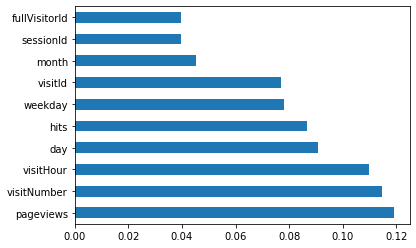

In [ ]:
##Feature Selection with Feature importance(using ExtraTreesRegressor)
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based regressor
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

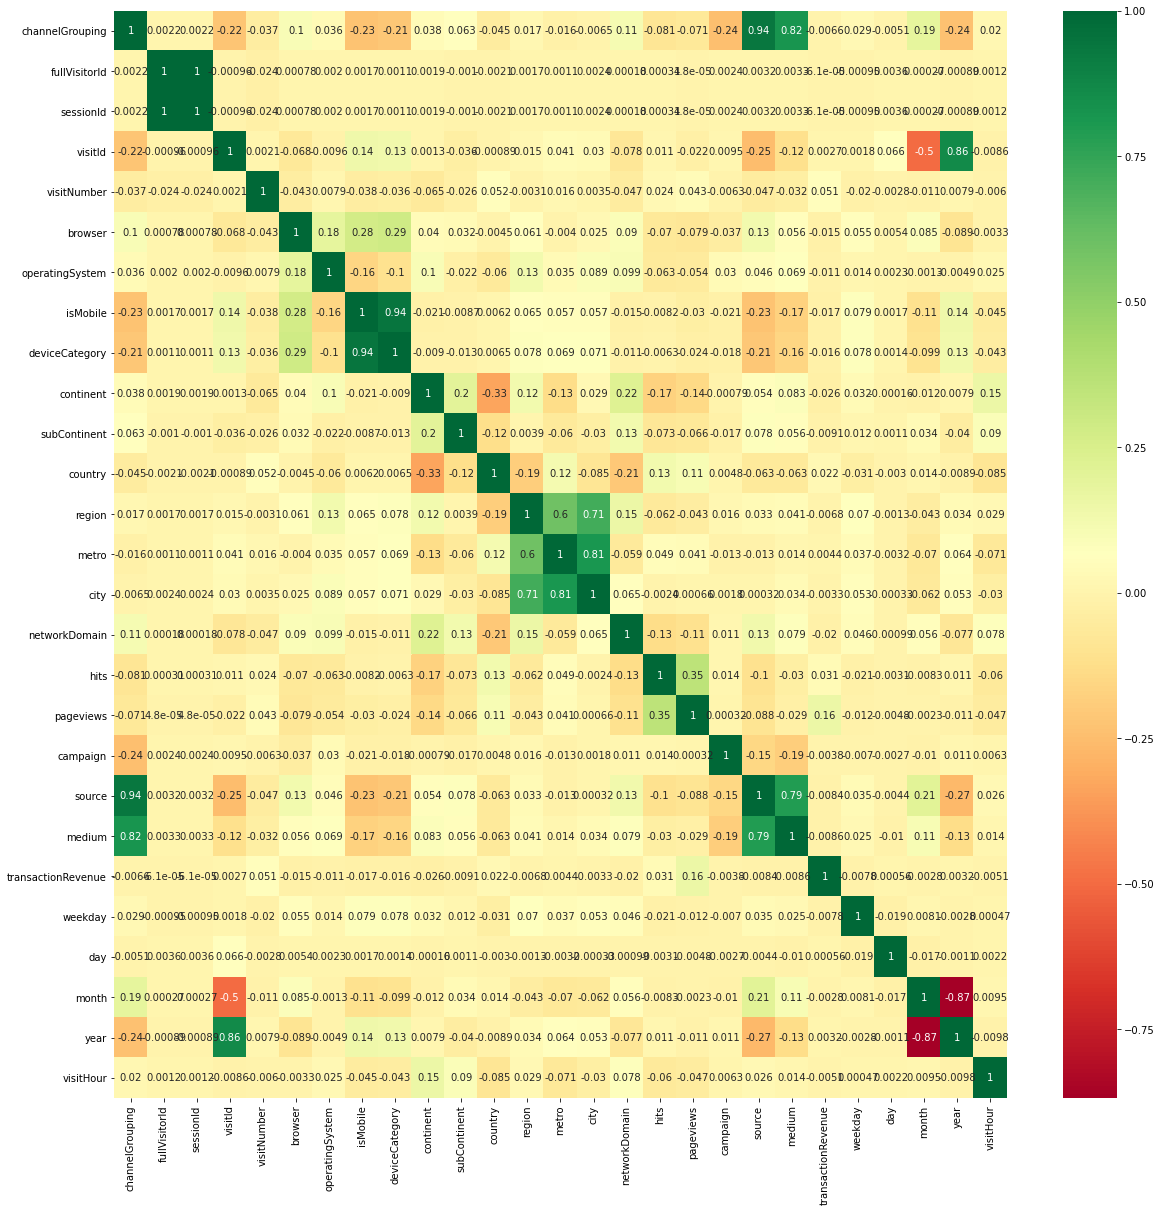

In [ ]:
## Feature Selection using Correlation Matrix(heatmap)
corrmat = final_df.corr()#get correlations of each features in dataset
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
## Feature Selection by univariate technique(using chi2 test)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = final_df.drop('transactionRevenue',axis=1) #independent columns
y = final_df['transactionRevenue']  #target column i.e transactionRevenue

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['columns','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features'''

NameError: ignored